# EDA and necessary pre-processing steps in dataset.

## Import LIBRARIES

In [ ]:
# data wrangling

import os
import re
import string
import pandas as pd
import numpy as np
import spacy
import textwrap

# data visualization

import matplotlib.pyplot as plt
import seaborn as sns
import pyLDAvis
import pyLDAvis.gensim as gensimvis

# text modelling

import nltk
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
import en_core_web_sm
import gensim
from gensim import corpora
from gensim.corpora.dictionary import Dictionary
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel
from spacy import displacy
import random

# filter warning

import warnings
warnings.filterwarnings('ignore',category=DeprecationWarning)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Dataset Collection

In [ ]:
# Path of downloaded CSV files
directory = os.getcwd() + "/notebook/Dataset_archive"
all_dataframes = []
total_sum = 0

for filename in os.listdir(directory):
    if filename.endswith(".csv"): # replace with the extension of the files you want to merge
        filepath = os.path.join(directory, filename)
        # Load the CSV file into a pandas
        df = pd.read_csv(filepath)
        row_sum = df.shape[0]
        print("File Size of",filename," :- ",df.shape)
        total_sum += row_sum
        df["Filename"] = filename # add new column with filename
        all_dataframes.append(df)

merged_df = pd.concat(all_dataframes, ignore_index=True)
merged_df.to_csv(os.getcwd() + "/merged_data.csv", index=False)

print("Total Records in all files :- ",total_sum)
print("\nTo join all the CSV files and create a new file merged_data.csv with an additional column that contains the filename itself :- \n")
print("File size of merged_data.csv file :- ",merged_df.shape)
print("Total Records in merged_data.csv file :- ",merged_df.shape[0])


File Size of BoatProduct.csv  :-  (1449, 7)
File Size of Immortal gaming.csv  :-  (0, 7)
File Size of Limited Edition.csv  :-  (140, 7)
File Size of Misfit.csv  :-  (48, 7)
File Size of Mobile Accessories.csv  :-  (118, 7)
File Size of TRebel.csv  :-  (143, 7)
File Size of bluetooth speakers.csv  :-  (114, 7)
File Size of smart watches.csv  :-  (196, 7)
File Size of wired headphones.csv  :-  (153, 7)
File Size of wireless earbuds.csv  :-  (209, 7)
File Size of wireless headphones.csv  :-  (287, 7)
Total Records in all files :-  2857

To join all the CSV files and create a new file merged_data.csv with an additional column that contains the filename itself :- 

File size of merged_data.csv file :-  (2857, 8)
Total Records in merged_data.csv file :-  2857


### Obervations :-
Assumption - We are going to extract summary column from all the files and use them as one data set for this assignment.
Here we read downloaded files from given link and checking how many rows & columns we have in each CSV file and then reading all the files one by one and joined all the files in one master file called merged_data.csv file. Here we can see that master file have with an additional column that contains the filename itself.

In [ ]:
# Taking backcup copy of master DataFrame
master_df = merged_df.copy(deep=True)
master_df.shape

(2857, 8)

### Obervations :-
Here, we use the .copy() method to create a deep copy of the merged_df DataFrame, which means both the data and index are copied. We pass deep=True to ensure that all nested objects are copied as well.

In [ ]:
merged_df.head(5)

,ProductName,ProductPrice,Discount,NumberofReviews,Rate,Review,Summary,Filename
0,Stone 1000v2,"\nSale price₹ 3,999",43% off,7 reviews,★\n 5.0\n,Fantastic product,Very good product in this price range..,BoatProduct.csv
1,Stone 1000v2,"Sale price₹ 3,999",43% off,7 reviews,★\n 5.0\n,Outstanding,Outstanding Product,BoatProduct.csv
2,Stone 1000v2,"\nSale price₹ 3,999",43% off,7 reviews,★\n 5.0\n,Awesome,Works like a charm. Good sound quality. Visual...,BoatProduct.csv
3,Stone 1000v2,"\nSale price₹ 3,999",43% off,7 reviews,★\n 5.0\n,Boat stone 1000 v2,Great,BoatProduct.csv
4,Stone 1000v2,"\nSale price₹ 3,999",43% off,7 reviews,★\n 5.0\n,Quality sound,Amazing sound quality.totally premium.&.afford...,BoatProduct.csv


In [ ]:
merged_df.tail(5)

,ProductName,ProductPrice,Discount,NumberofReviews,Rate,Review,Summary,Filename
2852,Trebel Rockerz 255 Pro+,"\nSale price₹ 1,599",60% off,7 reviews,★\n 4.7\n,NaN,Trebel Rockerz 255 Pro+,wireless headphones.csv
2853,Trebel Rockerz 255 Pro+,"\nSale price₹ 1,599",60% off,7 reviews,★\n 4.7\n,Awesome product,I am using this since 10 months and fully sati...,wireless headphones.csv
2854,Trebel Rockerz 255 Pro+,"\nSale price₹ 1,599",60% off,7 reviews,★\n 4.7\n,Awesome,Sound quality good best Material,wireless headphones.csv
2855,Trebel Rockerz 255 Pro+,"\nSale price₹ 1,599",60% off,7 reviews,★\n 4.7\n,Best service,Best service and best product very staisfied,wireless headphones.csv
2856,Trebel Rockerz 255 Pro+,"\nSale price₹ 1,599",60% off,7 reviews,★\n 4.7\n,Worthy deal except the ipl tickets :|,"Haven't heard my friends saying,"" tu earphones...",wireless headphones.csv


In [ ]:
merged_df.columns

Index(['ProductName', 'ProductPrice', 'Discount', 'NumberofReviews', 'Rate',
       'Review', 'Summary', 'Filename'],
      dtype='object')

In [ ]:
merged_df.describe()

,ProductName,ProductPrice,Discount,NumberofReviews,Rate,Review,Summary,Filename
count,2857,2856,2856,2856,2856,1710,2856,2857
unique,184,49,44,90,8,374,734,10
top,TRebel Airdopes 141,"\nSale price₹ 1,499",60% off,7 reviews,★\n 4.8\n,Good,Good,BoatProduct.csv
freq,48,328,446,150,1084,129,121,1449


In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2857 entries, 0 to 2856
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ProductName      2857 non-null   object
 1   ProductPrice     2856 non-null   object
 2   Discount         2856 non-null   object
 3   NumberofReviews  2856 non-null   object
 4   Rate             2856 non-null   object
 5   Review           1710 non-null   object
 6   Summary          2856 non-null   object
 7   Filename         2857 non-null   object
dtypes: object(8)
memory usage: 178.7+ KB


### Obervations :-
All columns have object Datatype. In our this assigment we are going to use "Summary" column for further processing.

In [ ]:
# Checkig for null values
merged_df.isnull().sum()

ProductName           0
ProductPrice          1
Discount              1
NumberofReviews       1
Rate                  1
Review             1147
Summary               1
Filename              0
dtype: int64

### Obervations :-
"Review" column have more null values. "Summary" column have only one null entry. Since the null values are not more than 1% of the total data for Summary column, we can drop the null values.

In [ ]:
# Droping out Null value of "Summary" column
merged_df = merged_df.dropna(subset=["Summary"])

# Checkig again for null values
merged_df.isnull().sum()

ProductName           0
ProductPrice          0
Discount              0
NumberofReviews       0
Rate                  0
Review             1146
Summary               0
Filename              0
dtype: int64

### Obervations :-
Removed Null Values from "Summary" column

In [ ]:
merged_df

,ProductName,ProductPrice,Discount,NumberofReviews,Rate,Review,Summary,Filename
0,Stone 1000v2,"\nSale price₹ 3,999",43% off,7 reviews,★\n 5.0\n,Fantastic product,Very good product in this price range..,BoatProduct.csv
1,Stone 1000v2,"Sale price₹ 3,999",43% off,7 reviews,★\n 5.0\n,Outstanding,Outstanding Product,BoatProduct.csv
2,Stone 1000v2,"\nSale price₹ 3,999",43% off,7 reviews,★\n 5.0\n,Awesome,Works like a charm. Good sound quality. Visual...,BoatProduct.csv
3,Stone 1000v2,"\nSale price₹ 3,999",43% off,7 reviews,★\n 5.0\n,Boat stone 1000 v2,Great,BoatProduct.csv
4,Stone 1000v2,"\nSale price₹ 3,999",43% off,7 reviews,★\n 5.0\n,Quality sound,Amazing sound quality.totally premium.&.afford...,BoatProduct.csv
...,...,...,...,...,...,...,...,...
2852,Trebel Rockerz 255 Pro+,"\nSale price₹ 1,599",60% off,7 reviews,★\n 4.7\n,NaN,Trebel Rockerz 255 Pro+,wireless headphones.csv
2853,Trebel Rockerz 255 Pro+,"\nSale price₹ 1,599",60% off,7 reviews,★\n 4.7\n,Awesome product,I am using this since 10 months and fully sati...,wireless headphones.csv
2854,Trebel Rockerz 255 Pro+,"\nSale price₹ 1,599",60% off,7 reviews,★\n 4.7\n,Awesome,Sound quality good best Material,wireless headphones.csv
2855,Trebel Rockerz 255 Pro+,"\nSale price₹ 1,599",60% off,7 reviews,★\n 4.7\n,Best service,Best service and best product very staisfied,wireless headphones.csv


In [ ]:
# Cleaning ProductPrice Column

def clean_price(price_str):
    # Need to remove non-numeric characters using regular expression
    price_str_clean = re.sub(r'[^0-9\.]', '', price_str)
    # convert remaining string to float
    try:
        price_clean = float(price_str_clean)
    except ValueError:
        # handle any remaining errors
        price_clean = None
    return price_clean

merged_df['ProductPrice'] = merged_df['ProductPrice'].apply(clean_price)
merged_df

,ProductName,ProductPrice,Discount,NumberofReviews,Rate,Review,Summary,Filename
0,Stone 1000v2,3999.0,43% off,7 reviews,★\n 5.0\n,Fantastic product,Very good product in this price range..,BoatProduct.csv
1,Stone 1000v2,3999.0,43% off,7 reviews,★\n 5.0\n,Outstanding,Outstanding Product,BoatProduct.csv
2,Stone 1000v2,3999.0,43% off,7 reviews,★\n 5.0\n,Awesome,Works like a charm. Good sound quality. Visual...,BoatProduct.csv
3,Stone 1000v2,3999.0,43% off,7 reviews,★\n 5.0\n,Boat stone 1000 v2,Great,BoatProduct.csv
4,Stone 1000v2,3999.0,43% off,7 reviews,★\n 5.0\n,Quality sound,Amazing sound quality.totally premium.&.afford...,BoatProduct.csv
...,...,...,...,...,...,...,...,...
2852,Trebel Rockerz 255 Pro+,1599.0,60% off,7 reviews,★\n 4.7\n,NaN,Trebel Rockerz 255 Pro+,wireless headphones.csv
2853,Trebel Rockerz 255 Pro+,1599.0,60% off,7 reviews,★\n 4.7\n,Awesome product,I am using this since 10 months and fully sati...,wireless headphones.csv
2854,Trebel Rockerz 255 Pro+,1599.0,60% off,7 reviews,★\n 4.7\n,Awesome,Sound quality good best Material,wireless headphones.csv
2855,Trebel Rockerz 255 Pro+,1599.0,60% off,7 reviews,★\n 4.7\n,Best service,Best service and best product very staisfied,wireless headphones.csv


### Obervations :-
The clean_price() function cleans a string representing a price by removing all non-numeric characters and converting it to a float. It returns None if the string can't be converted. The function is applied to the 'ProductPrice' column of a Pandas dataframe, producing a new column with cleaned price values.

In [ ]:
# Cleaning Discount Column
merged_df['Discount'] = merged_df['Discount'].str.split(" ", n=1, expand=True)[0]
merged_df

,ProductName,ProductPrice,Discount,NumberofReviews,Rate,Review,Summary,Filename
0,Stone 1000v2,3999.0,43%,7 reviews,★\n 5.0\n,Fantastic product,Very good product in this price range..,BoatProduct.csv
1,Stone 1000v2,3999.0,43%,7 reviews,★\n 5.0\n,Outstanding,Outstanding Product,BoatProduct.csv
2,Stone 1000v2,3999.0,43%,7 reviews,★\n 5.0\n,Awesome,Works like a charm. Good sound quality. Visual...,BoatProduct.csv
3,Stone 1000v2,3999.0,43%,7 reviews,★\n 5.0\n,Boat stone 1000 v2,Great,BoatProduct.csv
4,Stone 1000v2,3999.0,43%,7 reviews,★\n 5.0\n,Quality sound,Amazing sound quality.totally premium.&.afford...,BoatProduct.csv
...,...,...,...,...,...,...,...,...
2852,Trebel Rockerz 255 Pro+,1599.0,60%,7 reviews,★\n 4.7\n,NaN,Trebel Rockerz 255 Pro+,wireless headphones.csv
2853,Trebel Rockerz 255 Pro+,1599.0,60%,7 reviews,★\n 4.7\n,Awesome product,I am using this since 10 months and fully sati...,wireless headphones.csv
2854,Trebel Rockerz 255 Pro+,1599.0,60%,7 reviews,★\n 4.7\n,Awesome,Sound quality good best Material,wireless headphones.csv
2855,Trebel Rockerz 255 Pro+,1599.0,60%,7 reviews,★\n 4.7\n,Best service,Best service and best product very staisfied,wireless headphones.csv


### Obervations :-
Here we are cleaning the 'Discount' column in a Pandas dataframe by splitting it at the first space character and keeping only the first column containing the percentage amount as a string. The cleaned 'Discount' column replaces the original 'Discount' column.

In [ ]:
# Cleaning NumberofReviews column
merged_df['NumberofReviews'] = merged_df['NumberofReviews'].str.split(" ", n=1, expand=True)[0].astype('category')
merged_df['NumberofReviews'] = pd.to_numeric(merged_df['NumberofReviews'], errors='coerce')
merged_df

,ProductName,ProductPrice,Discount,NumberofReviews,Rate,Review,Summary,Filename
0,Stone 1000v2,3999.0,43%,7.0,★\n 5.0\n,Fantastic product,Very good product in this price range..,BoatProduct.csv
1,Stone 1000v2,3999.0,43%,7.0,★\n 5.0\n,Outstanding,Outstanding Product,BoatProduct.csv
2,Stone 1000v2,3999.0,43%,7.0,★\n 5.0\n,Awesome,Works like a charm. Good sound quality. Visual...,BoatProduct.csv
3,Stone 1000v2,3999.0,43%,7.0,★\n 5.0\n,Boat stone 1000 v2,Great,BoatProduct.csv
4,Stone 1000v2,3999.0,43%,7.0,★\n 5.0\n,Quality sound,Amazing sound quality.totally premium.&.afford...,BoatProduct.csv
...,...,...,...,...,...,...,...,...
2852,Trebel Rockerz 255 Pro+,1599.0,60%,7.0,★\n 4.7\n,NaN,Trebel Rockerz 255 Pro+,wireless headphones.csv
2853,Trebel Rockerz 255 Pro+,1599.0,60%,7.0,★\n 4.7\n,Awesome product,I am using this since 10 months and fully sati...,wireless headphones.csv
2854,Trebel Rockerz 255 Pro+,1599.0,60%,7.0,★\n 4.7\n,Awesome,Sound quality good best Material,wireless headphones.csv
2855,Trebel Rockerz 255 Pro+,1599.0,60%,7.0,★\n 4.7\n,Best service,Best service and best product very staisfied,wireless headphones.csv


### Obervations :-
Here we are cleaning the 'NumberofReviews' column in a Pandas dataframe by removing non-numeric characters, converting the result to numeric data type, and keeping only the first column as a category data type. Non-numeric values are set to NaN, and the cleaned 'NumberofReviews' column replaces the original column.

In [ ]:
# Cleaning of Rate Column

def convert_rate(rate):
    try:
        rate_value = float(rate.strip().split()[-1])
    except ValueError:
        rate_value = None
    return rate_value

merged_df['Rate'] = merged_df['Rate'].apply(convert_rate)
merged_df

,ProductName,ProductPrice,Discount,NumberofReviews,Rate,Review,Summary,Filename
0,Stone 1000v2,3999.0,43%,7 reviews,5.0,Fantastic product,Very good product in this price range..,BoatProduct.csv
1,Stone 1000v2,3999.0,43%,7 reviews,5.0,Outstanding,Outstanding Product,BoatProduct.csv
2,Stone 1000v2,3999.0,43%,7 reviews,5.0,Awesome,Works like a charm. Good sound quality. Visual...,BoatProduct.csv
3,Stone 1000v2,3999.0,43%,7 reviews,5.0,Boat stone 1000 v2,Great,BoatProduct.csv
4,Stone 1000v2,3999.0,43%,7 reviews,5.0,Quality sound,Amazing sound quality.totally premium.&.afford...,BoatProduct.csv
...,...,...,...,...,...,...,...,...
2852,Trebel Rockerz 255 Pro+,1599.0,60%,7 reviews,4.7,NaN,Trebel Rockerz 255 Pro+,wireless headphones.csv
2853,Trebel Rockerz 255 Pro+,1599.0,60%,7 reviews,4.7,Awesome product,I am using this since 10 months and fully sati...,wireless headphones.csv
2854,Trebel Rockerz 255 Pro+,1599.0,60%,7 reviews,4.7,Awesome,Sound quality good best Material,wireless headphones.csv
2855,Trebel Rockerz 255 Pro+,1599.0,60%,7 reviews,4.7,Best service,Best service and best product very staisfied,wireless headphones.csv


### Obervations :-
Here we are cleaning a 'Rate' column in a Pandas dataframe by removing leading and trailing whitespaces, extracting the last value as a float and replacing the column values with cleaned rate values or None where no value could be extracted.

In [ ]:
# Defining function for preprocessing

# List of English stop words
english_stop_words=set(stopwords.words("english"))

def preprocess(text,remove_digits=True):
    # For replacing non-word characters
    text = re.sub('\W+',' ', text)
    # For replacng extra spaces
    text = re.sub('\s+',' ', text)
    # Remove all the numbers except those attached to a word
    text = re.sub("(?<!\w)\d+", "", text)
    # Remove all the hyphens except between two words
    text = re.sub("-(?!\w)|(?<!\w)-", "", text)
    text=text.lower()
    # For removing punctuation in the strings
    nopunc=[char for char in text if char not in string.punctuation]
    nopunc=''.join(nopunc)
    # For removing stop words
    return [word for word in nopunc.split() if word.lower() not in english_stop_words]

### Obervations :-
Here we are defining a function named preprocess that takes a text parameter and sets a remove_digits parameter to True. The function applies several regular expressions to clean the text, replacing non-word characters and extra spaces, and removing numbers and hyphens that are not attached to a word. The text is then converted to lowercase and all punctuation is removed. The function returns a list of cleaned words that are not English stop words.

In [ ]:
# define a helper function to convert the POS tags returned by NLTK to the format accepted by WordNetLemmatizer
def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return None

### Obervations :-
Here we are defining a function named get_wordnet_pos that takes a treebank tag as a parameter and maps it to the format accepted by WordNetLemmatizer. The function first checks the first character of the tag to determine its part of speech, returning the corresponding WordNet part of speech constant to be used in the lemmatization process. If it cannot determine a part of speech, the function returns None. This helper function is useful when using NLTK's pos_tag() function for part-of-speech tagging and later using WordNetLemmatizer for lemmatization.

In [ ]:
# Defining a function for lemitization
def lemmatize_POStag(words):

    lemmatizer = WordNetLemmatizer()
    lemmas = []
   # for word in words:
    #    lemma = lemmatizer.lemmatize(word, pos='v')
     #   lemmas.append(lemma)
    for word, pos_tag in nltk.pos_tag(words):
        pos = get_wordnet_pos(pos_tag) or wordnet.NOUN
        lemmas.append(lemmatizer.lemmatize(word, pos=pos))
    return lemmas

def lemmatize(words):
    lemmas = lemmatize_POStag(words)
    return lemmas

### Obervations :-
The lemmatize_POStag() function takes a list of words, tags each word with its part of speech using NLTK's pos_tag(), maps each part of speech to the format accepted by WordNetLemmatizer, and lemmatizes each word with its corresponding part of speech. It then returns a list of the resulting lemmas.
The lemmatize() function takes a list of words, calls the lemmatize_POStag() function on it, and returns the resulting list of lemmas.
These functions are useful for reducing words of text data to their base form for natural language processing tasks, such as sentiment analysis or topic modeling.

In [ ]:
#converting them into string
def listtostring(s):
  str1=' '
  return (str1.join(s))

### Obervations :-
The listtostring() function takes a list parameter s and concatenates each element in the list into a single string, separated by a space character. The resulting string is returned. This function is useful for preparing input data for natural language processing algorithms that require a string input but have a list of words as an input.

In [ ]:
def clean_text(input):
  word=preprocess(input)
  lemmas=lemmatize(word)
  return listtostring(lemmas)

# Applied function to clean the txt column
merged_df['Summary'] = merged_df['Summary'].apply(clean_text)

### Obervations :-
The clean_text() function takes an input string parameter that represents text data. It applies the preprocess() function to the input string to clean the text and the lemmatize() function to lemmatize each word to its base form. It then applies the listtostring() function to concatenate the resulting list of lemmas into a single string separated by a space character.
The apply() function is then called on the 'Summary' column of a dataframe, passing the clean_text function as an argument. This replaces the original 'Summary' column with a new column of cleaned, lemmatized, and concatenated string values. This function is useful for preparing text data for natural language processing tasks, such as sentiment analysis or topic modeling, where cleaned, reduced, and formatted text data is crucial for accurate analysis or modeling.

In [ ]:
merged_df

,ProductName,ProductPrice,Discount,NumberofReviews,Rate,Review,Summary,Filename
0,Stone 1000v2,3999.0,43%,7 reviews,5.0,Fantastic product,good product price range,BoatProduct.csv
1,Stone 1000v2,3999.0,43%,7 reviews,5.0,Outstanding,outstanding product,BoatProduct.csv
2,Stone 1000v2,3999.0,43%,7 reviews,5.0,Awesome,work like charm good sound quality visually at...,BoatProduct.csv
3,Stone 1000v2,3999.0,43%,7 reviews,5.0,Boat stone 1000 v2,great,BoatProduct.csv
4,Stone 1000v2,3999.0,43%,7 reviews,5.0,Quality sound,amaze sound quality totally premium affordable,BoatProduct.csv
...,...,...,...,...,...,...,...,...
2852,Trebel Rockerz 255 Pro+,1599.0,60%,7 reviews,4.7,NaN,trebel rockerz pro,wireless headphones.csv
2853,Trebel Rockerz 255 Pro+,1599.0,60%,7 reviews,4.7,Awesome product,use since month fully satisfy rockerz pro awes...,wireless headphones.csv
2854,Trebel Rockerz 255 Pro+,1599.0,60%,7 reviews,4.7,Awesome,sound quality good best material,wireless headphones.csv
2855,Trebel Rockerz 255 Pro+,1599.0,60%,7 reviews,4.7,Best service,best service best product staisfied,wireless headphones.csv


In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2856 entries, 0 to 2856
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ProductName      2856 non-null   object 
 1   ProductPrice     2846 non-null   float64
 2   Discount         2856 non-null   object 
 3   NumberofReviews  2856 non-null   object 
 4   Rate             2846 non-null   float64
 5   Review           1710 non-null   object 
 6   Summary          2856 non-null   object 
 7   Filename         2856 non-null   object 
dtypes: float64(2), object(6)
memory usage: 200.8+ KB


In [ ]:
# Changing data type of Summary column
merged_df['Summary']=merged_df['Summary'].astype('category')

In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2856 entries, 0 to 2856
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   ProductName      2856 non-null   object  
 1   ProductPrice     2846 non-null   float64 
 2   Discount         2856 non-null   object  
 3   NumberofReviews  2856 non-null   object  
 4   Rate             2846 non-null   float64 
 5   Review           1710 non-null   object  
 6   Summary          2856 non-null   category
 7   Filename         2856 non-null   object  
dtypes: category(1), float64(2), object(5)
memory usage: 205.4+ KB


In [ ]:
# Load the Summary column data into a series and then converting into df DataFrame
df = merged_df['Summary'].copy(deep=True)
df = df.to_frame("Summary")
df

,Summary
0,good product price range
1,outstanding product
2,work like charm good sound quality visually at...
3,great
4,amaze sound quality totally premium affordable
...,...
2852,trebel rockerz pro
2853,use since month fully satisfy rockerz pro awes...
2854,sound quality good best material
2855,best service best product staisfied


count    2856.000000
mean       39.982843
std        46.941004
min         0.000000
25%        12.000000
50%        21.000000
75%        54.000000
max       491.000000
Name: Summary, dtype: float64

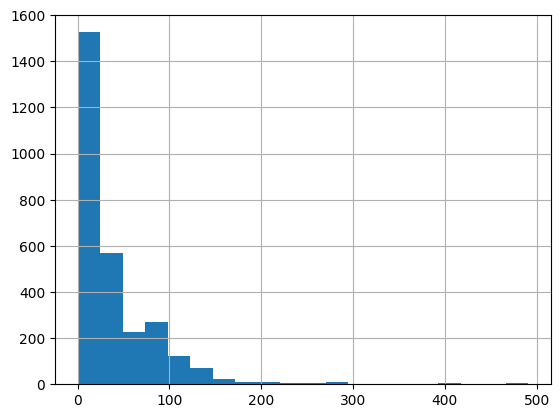

In [ ]:
#How long are reviews in summary column?
df.Summary.apply(len).hist(bins =20)
df.Summary.apply(len).describe()

### Obervations :-
Mostly, reviews extend from a few lines to short paragraphs. There are a few very long reviews that might extend to several pages.

In [ ]:
#Longest review

max_length_index = df['Summary'].apply(len).idxmax()
max_length_Summary = df.loc[max_length_index, 'Summary']
wrapped_text = textwrap.wrap(max_length_Summary, width=150)
print(wrapped_text)

['first thanks boat fast delivery amazed packaging product good forst time purchase neckband say bluetooth accessory reason regret buy charge accessory', 'especially earbuds need charge regularly always use move cheap one waste money recently purchase boat neckband diwali sale get bad deal impress never', 'ever think boat bluetooth would magic sound quality superb easy use look stylish decent thing love battery backup receive product almost week battery', 'decrease e really impressed thankyou keep']


## Stop Words Removal

In [ ]:
# List of English stop words
english_stop_words=set(stopwords.words("english"))
print(len(english_stop_words))
print(english_stop_words)

179
{'than', 'on', 're', 'won', "hasn't", 'in', 'don', 'off', "aren't", 'did', "should've", 'ourselves', 'not', 'while', 'haven', 'him', "won't", 'does', 'this', 'further', 'over', 'weren', 'an', "shan't", 'me', "you've", 'just', 'it', 'his', 'himself', 'down', 'for', 'again', 'hers', 'my', 'll', 'wouldn', 'its', "you'd", 'their', 'very', 'such', 'd', 'we', 'below', 'before', "it's", "mightn't", 'how', 'now', 'yours', 'out', 'under', 'some', 'can', 'ours', 'm', 'why', "she's", 'during', 'shan', 'needn', 'your', 'and', 'nor', 'that', 'because', 't', 'hasn', 'from', "shouldn't", 'is', "wouldn't", 'mustn', 'these', "didn't", 'of', 'doing', 'no', "couldn't", 'they', 'but', 'our', 'then', 'had', 'until', "haven't", 'should', 'are', "doesn't", "you're", 'them', 'didn', 'at', 'through', 'has', 've', "wasn't", 'itself', 'so', "needn't", 'themselves', 'who', 'here', "hadn't", 'ma', 'couldn', 'other', 'wasn', 'isn', 's', 'yourselves', 'having', "don't", 'above', 'mightn', 'more', 'was', 'those',

### Obervations :-
Here we are going to remove all english stop words from corpus data.

In [ ]:
# Define a function for Removal of stop words

def remove_stopwords_from_texts(texts):
    textArr = texts.split(' ')
    stop_clean = " ".join([i for i in textArr if i not in english_stop_words])
    return stop_clean

In [ ]:
# remove stopwords from the dataset

df['Summary'] = df['Summary'].apply(remove_stopwords_from_texts)

### Obervations :-
This function named remove_stopwords_from_texts called and applies it to each cell in the specified columns ('Summary') of the DataFrame df. The function is designed to remove stop words from the text in each cell.

In [ ]:
df

,Summary
0,good product price range
1,outstanding product
2,work like charm good sound quality visually at...
3,great
4,amaze sound quality totally premium affordable
...,...
2852,trebel rockerz pro
2853,use since month fully satisfy rockerz pro awes...
2854,sound quality good best material
2855,best service best product staisfied


## Lemmatization

In [ ]:
# load spacymodel for lemmatization
nlp = en_core_web_sm.load(disable=['parser', 'ner'])

# Function to lemmatize text
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ','VERB', 'ADV']):
    for sent in texts:
        doc = nlp(sent)
        yield [token.lemma_ for token in doc if token.pos_ in allowed_postags]

# Apply lemmatization
text_list = df['Summary'].tolist()
tokenized_reviews = list(lemmatization(text_list))

In [ ]:
# Display the first 15 results to shorten the lonng output window
tokenized_reviews[0:15]

[['good', 'product', 'price', 'range'],
 ['outstanding', 'product'],
 ['work', 'charm', 'good', 'sound', 'quality', 'visually', 'attractive', 'v1'],
 ['great'],
 ['amaze', 'sound', 'quality', 'totally', 'premium', 'affordable'],
 ['boat', 'stone', 'v2'],
 ['nice', 'product'],
 ['boat',
  'stone',
  'grenade',
  'speaker',
  'full',
  'range',
  'driver',
  'high',
  'nonstop',
  'playback'],
 ['nice', 'quality', 'amaze', 'flight', 'good'],
 ['sound', 'good'],
 ['add', 'hub', 'also'],
 ['boat', 'stone', 'grenade'],
 ['great', 'audio', 'quite', 'loud'],
 ['boat',
  'stone',
  'wireless',
  'portable',
  'speaker',
  'dynamic',
  'driver',
  'nonstop',
  'playback',
  'water',
  'resistant'],
 ['product', 'amazing']]

In [ ]:
# before lemma

print(text_list[7])

boat stone grenade bluetooth speaker full range driver high fidelity stereo sound hrs nonstop playback


In [ ]:
# after lemma

print(tokenized_reviews[7])

['boat', 'stone', 'grenade', 'speaker', 'full', 'range', 'driver', 'high', 'nonstop', 'playback']


### Obervations :-
Here we cab see the difference between the before and after lemmatization process.

# Using the LDA algorithm create the Topics

## MODELLING

### Now we will create vocabulary dictionary and document term matrix.

In [ ]:
# Create a dictionary from the corpus tokenized_reviews

dictionary = corpora.Dictionary(tokenized_reviews)

# Create a bag-of-word representation (document matrix) of the corpus
doc_term_matrix = [dictionary.doc2bow(rev) for rev in tokenized_reviews]

### Obervations :-
This code creates a dictionary object called 'dictionary' from a list of tokenized_reviews. The dictionary object contains a mapping of the unique words in the tokenized_reviews to their integer ids. The corpora.Dictionary() function is used to create the dictionary object.
The 'doc_term_matrix' object is created as a list comprehension iterating over each review in the list of tokenized_reviews. The dictionary.doc2bow() method is called on each review to create a bag-of-words representation of the review, which represents the frequency of each word in the review. Each resulting bag-of-words representation is then appended to the doc_term_matrix list.
Overall, this code is useful for creating a numerical representation of text data in a format that can be used for natural language processing tasks, such as topic modeling or clustering. By creating a dictionary and then counting word frequencies in a document using the doc2bow() method, we can convert text data into a mathematical representation that a machine can process.

In [ ]:
# Display the first 15 results to shorten the lonng output window
for key, value in dictionary.items():
    if key < 15:
        print(key, value)

0 good
1 price
2 product
3 range
4 outstanding
5 attractive
6 charm
7 quality
8 sound
9 v1
10 visually
11 work
12 great
13 affordable
14 amaze


In [ ]:
# Display the first 15 results to shorten the lonng output window
doc_term_matrix[0:15]

[[(0, 1), (1, 1), (2, 1), (3, 1)],
 [(2, 1), (4, 1)],
 [(0, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1)],
 [(12, 1)],
 [(7, 1), (8, 1), (13, 1), (14, 1), (15, 1), (16, 1)],
 [(17, 1), (18, 1), (19, 1)],
 [(2, 1), (20, 1)],
 [(3, 1),
  (17, 1),
  (18, 1),
  (21, 1),
  (22, 1),
  (23, 1),
  (24, 1),
  (25, 1),
  (26, 1),
  (27, 1)],
 [(0, 1), (7, 1), (14, 1), (20, 1), (28, 1)],
 [(0, 1), (8, 1)],
 [(29, 1), (30, 1), (31, 1)],
 [(17, 1), (18, 1), (23, 1)],
 [(12, 1), (32, 1), (33, 1), (34, 1)],
 [(17, 1),
  (18, 1),
  (21, 1),
  (25, 1),
  (26, 1),
  (27, 1),
  (35, 1),
  (36, 1),
  (37, 1),
  (38, 1),
  (39, 1)],
 [(2, 1), (40, 1)]]

### We can start to build the model using LDA.

In [ ]:
# Creating the object for LDA model using gensim library

LDA = gensim.models.ldamodel.LdaModel

In [ ]:
# Build LDA model

lda_model = LDA(corpus = doc_term_matrix, id2word = dictionary, num_topics = 15,
                random_state = 100, chunksize = 100, passes = 20)

In [ ]:
# print topics

lda_model.print_topics()

[(0,
  '0.265*"nice" + 0.196*"product" + 0.117*"great" + 0.060*"quality" + 0.054*"fast" + 0.038*"design" + 0.034*"delivery" + 0.029*"satisfy" + 0.026*"bluetooth" + 0.021*"premium"'),
 (1,
  '0.213*"awesome" + 0.184*"get" + 0.142*"superb" + 0.103*"cable" + 0.050*"receive" + 0.044*"durable" + 0.033*"phone" + 0.010*"output" + 0.009*"original" + 0.008*"feedback"'),
 (2,
  '0.001*"awsome" + 0.001*"wonderful" + 0.001*"fantastic" + 0.001*"cool" + 0.001*"replace" + 0.001*"ment" + 0.001*"blaze" + 0.001*"jakash" + 0.001*"mast" + 0.001*"today"'),
 (3,
  '0.112*"also" + 0.057*"purchase" + 0.055*"product" + 0.041*"happy" + 0.039*"feature" + 0.035*"experience" + 0.030*"year" + 0.029*"low" + 0.028*"ever" + 0.025*"enough"'),
 (4,
  '0.233*"boat" + 0.169*"rockerz" + 0.146*"hour" + 0.066*"thank" + 0.040*"upto" + 0.024*"resistance" + 0.024*"r" + 0.024*"satisfied" + 0.022*"water" + 0.022*"noise"'),
 (5,
  '0.180*"good" + 0.164*"sound" + 0.150*"quality" + 0.073*"use" + 0.045*"bass" + 0.032*"money" + 0.029*

### Obervations :-
Here we are using the gensim library to build an LDA (Latent Dirichlet Allocation) model from the 'doc_term_matrix' object and the 'dictionary' object. The LDA model is initialized with the LdaModel constructor and assigned to the 'LDA' variable.
The 'lda_model' object is created by passing several arguments to the LDA constructor, including the 'corpus' parameter as the 'doc_term_matrix' object, the 'id2word' parameter as the 'dictionary' object, 'num_topics' as the number of topics to extract (15 in this case), 'random_state' as the seed for the random number generator for reproducibility, 'chunksize' as the number of documents to be used in each training chunk, and 'passes' as the number of iterations over the corpus during training.
Finally, the lda_model.print_topics() method is called to print the top keywords for each topic in the LDA model. This code is useful for topic modeling tasks to extract topics from a corpus of text data.

# Coherence score and print Topics Extracted.

In [ ]:
# compute the coherence score

coherence_model_lda = CoherenceModel(model=lda_model, texts=tokenized_reviews, dictionary=dictionary , coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()

# print coherence score

print('\nBase Coherence Score: ', coherence_lda)


Base Coherence Score:  0.41938791379360557


### Obervations :-
Here we computes the coherence score of the LDA model calculated earlier. Coherence refers to the degree of semantic similarity between high scoring words in a topic. A coherence score measures the interpretability of the topics generated by the LDA model; the higher the coherence score, the better the interpretability of the topics.
The CoherenceModel from gensim.models is imported and used to compute the coherence score. The coherence score is calculated by passing the 'lda_model' object, the 'tokenized_reviews', and 'dictionary' to the coherence model, along with the coherence measure 'c_v'. The coherence_lda variable stores the computed coherence score.
Finally, the coherence score is printed using the print() function. This code is useful for assessing the quality of a topic model generated using the LDA algorithm (or similar topic modeling techniques) on a given corpus of text data.

In [ ]:
# Print the topics extracted
num_topics = lda_model.num_topics
print("No of topics :-",num_topics,"\n")
topics = lda_model.show_topics(formatted=False,num_topics=num_topics,num_words=12)
for idx, topic in topics:
    print('Topic: {} \nWords: {}'.format(idx, [word[0] for word in topic]))
    print('\n')

No of topics :- 15 

Topic: 0 
Words: ['nice', 'product', 'great', 'quality', 'fast', 'design', 'delivery', 'satisfy', 'bluetooth', 'premium', 'keep', 'never']


Topic: 1 
Words: ['awesome', 'get', 'superb', 'cable', 'receive', 'durable', 'phone', 'output', 'original', 'feedback', 'cost', 'hope']


Topic: 2 
Words: ['awsome', 'wonderful', 'fantastic', 'cool', 'replace', 'ment', 'blaze', 'jakash', 'mast', 'today', 'reply', 'understand']


Topic: 3 
Words: ['also', 'purchase', 'product', 'happy', 'feature', 'experience', 'year', 'low', 'ever', 'enough', 'right', 'talk']


Topic: 4 
Words: ['boat', 'rockerz', 'hour', 'thank', 'upto', 'resistance', 'r', 'satisfied', 'water', 'noise', 'sweat', 'playtime']


Topic: 5 
Words: ['good', 'sound', 'quality', 'use', 'bass', 'money', 'buy', 'look', 'earphone', 'worth', 'value', 'build']


Topic: 6 
Words: ['battery', 'backup', 'call', 'life', 'much', 'neckband', 'face', 'monitoring', 'month', 'impress', 'give', 'rate']


Topic: 7 
Words: ['good', '

### Obervations :-
Here we are printing the topics extracted by the LDA model in a human-readable format. It uses the 'show_topics()' method to extract topics from the LDA model, and the for loop to iterate through each topic and print the topic ID and the top 12 words from each topic in a clear and readable format. This code is useful for visually inspecting the topics generated by the LDA model and interpreting the meaning and semantic coherence of each topic.

# Visualize the topics

Now, we can visualize the topics, but before that we will measure the perplexity. **Perplexity** is a measure of how good the model is, the lower the better.

In [ ]:
# print perplexity

print('\nPerplexity: ', lda_model.log_perplexity(doc_term_matrix,total_docs=10000))


Perplexity:  -7.148341793224875


### Obervations :-
Perplexity is a measure of how well the model predicts the held-out sample (i.e., the sample that was not used for training). The lower the perplexity score, the better the model's performance.
The lda_model.log_perplexity() method takes the document-term matrix as an argument, along with an optional 'total_docs' parameter that sets the size of the held-out sample. If 'total_docs' is not specified, it defaults to the size of the input corpus.
Finally, the perplexity score is printed to the console using the print() function. This code is useful for assessing the quality of an LDA model in predicting held-out samples and can help identify overfitting or underfitting of the model to the training data.

In [ ]:
# visualize topics

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, doc_term_matrix, dictionary)

### Obervations :-
Here we use the pyLDAvis library to create an interactive visualization of the topics and their interrelationships generated by the LDA model. The 'enable_notebook()' method is called to enable the notebook mode in pyLDAvis. Then, the 'pyLDAvis.gensim.prepare()' method is called to prepare the LDA model by computing the term frequencies, topic-term distributions, and topic-topic interrelationships.
The 'vis' object contains all the data needed to display the interactive visualization. This code is useful for visualizing the generated topics and their interrelationships in an interactive and intuitive way.

In [ ]:
# show visualization

vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5      0.169384 -0.214613       1        1  16.470677
14    -0.255547 -0.202482       2        1  10.762286
7      0.297757 -0.182887       3        1   9.654022
13    -0.175732 -0.124124       4        1   7.727781
0      0.228665 -0.067310       5        1   7.611308
4     -0.258287 -0.208933       6        1   7.345728
9     -0.073549  0.067446       7        1   7.122991
3      0.087974  0.090918       8        1   6.764398
6     -0.058187  0.122261       9        1   5.602717
8     -0.058849  0.143919      10        1   4.479633
10     0.114918  0.062923      11        1   4.399724
1     -0.058104  0.156739      12        1   4.039180
12     0.140936  0.058210      13        1   3.875523
11    -0.050226  0.147122      14        1   3.144000
2     -0.051153  0.150811      15        1   1.000033, topic_info=          Term         Freq        Total Category  logprob  loglift
0         good  1238.000000  1238.000000  Default  30.0000  30.0000
17        boat   827.000000   827.000000  Default  29.0000  29.0000
2      product   820.000000   820.000000  Default  28.0000  28.0000
20        nice   315.000000   315.000000  Default  27.0000  27.0000
8        sound   423.000000   423.000000  Default  26.0000  26.0000
..         ...          ...          ...      ...      ...      ...
163    provide     0.172858     1.234818  Topic15  -6.8035   2.6389
204          u     0.172858     1.187458  Topic15  -6.8035   2.6780
214  condition     0.172858     1.186011  Topic15  -6.8035   2.6793
236    problem     0.172858     1.191820  Topic15  -6.8035   2.6744
249     useful     0.172858     1.184369  Topic15  -6.8035   2.6806

[516 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
336      13  0.935137   accessory
224      10  0.926384      accord
577       7  0.901957      active
215       3  0.887890    actually
13       13  0.933934  affordable
...     ...       ...         ...
11       14  0.993575        work
86        1  0.975268       worth
227      13  0.788378      worthy
455       8  0.979133        year
741      10  0.928877           र

[368 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 15, 8, 14, 1, 5, 10, 4, 7, 9, 11, 2, 13, 12, 3])

# Plot the dependency parser for any two random sentences from the entire corpus/dataset that has at least 10 words in the sentence. 


In [ ]:
# Select two sentences with at least 10 words

sentences = df[df['Summary'].str.split().apply(len) >= 10]['Summary'].sample(n=2, random_state=42)

sentences

2809    boat rockerz bluetooth headphone mm dynamic dr...
1059    boat trebel airdopes earbuds woman upto hour p...
Name: Summary, dtype: category
Categories (654, object): ['', 'a400 usb type c data cable', 'accessory miss quick response boat team send ..., 'add usb hub also', ..., 'write product description website exactly', 'write review use approximately year really am..., 'xtend talk premium design smartwatch build al..., '𝙸 𝚕𝚒𝚔𝚎 𝚒𝚝']

In [ ]:
# Load the English language model for spacy
nlp = spacy.load('en_core_web_sm')

# Process each sentence with the spacy parser and plot the dependency charts
for sentence in sentences:
    doc = nlp(sentence)
    # displacy.render(doc, style='dep', jupyter=True, options={'distance': 100})
    displacy.render(doc, style='dep', options={'compact': True, 'collapse_punct': False})

### Obervations :-
We use the spacy library to load the English language model and visualize the dependency relationships for two sentences stored in a pandas Series object called 'sentences'. The 'nlp()' function is called on each sentence to parse it and generate a 'doc' object containing the tokenized, tagged, and dependency-labeled tokens for the sentence.
The 'displacy.render()' function is then used to create a visual dependency chart to display the resulting parsed sentence.
It is a useful way to visualize the dependency relationships between words in a sentence, which can be helpful in natural language processing tasks like text classification or sentiment analysis. By providing powerful visualization tools, it allows data scientists and analysts to explore and analyze text data more effectively.

### Obervations :-
Arcs sometimes don't appear in Jupyter notebooks, and at other times are missing in the .html file conversion. We have attached a screenshot from Google Colab which displays how the arcs should appear. Unfortunately, they are not visible in the local Jupyter notebook on our PC or in the produced HTML file. However, they do appear when we create a PDF.
As a result, we have manually included the screenshot here for reference.

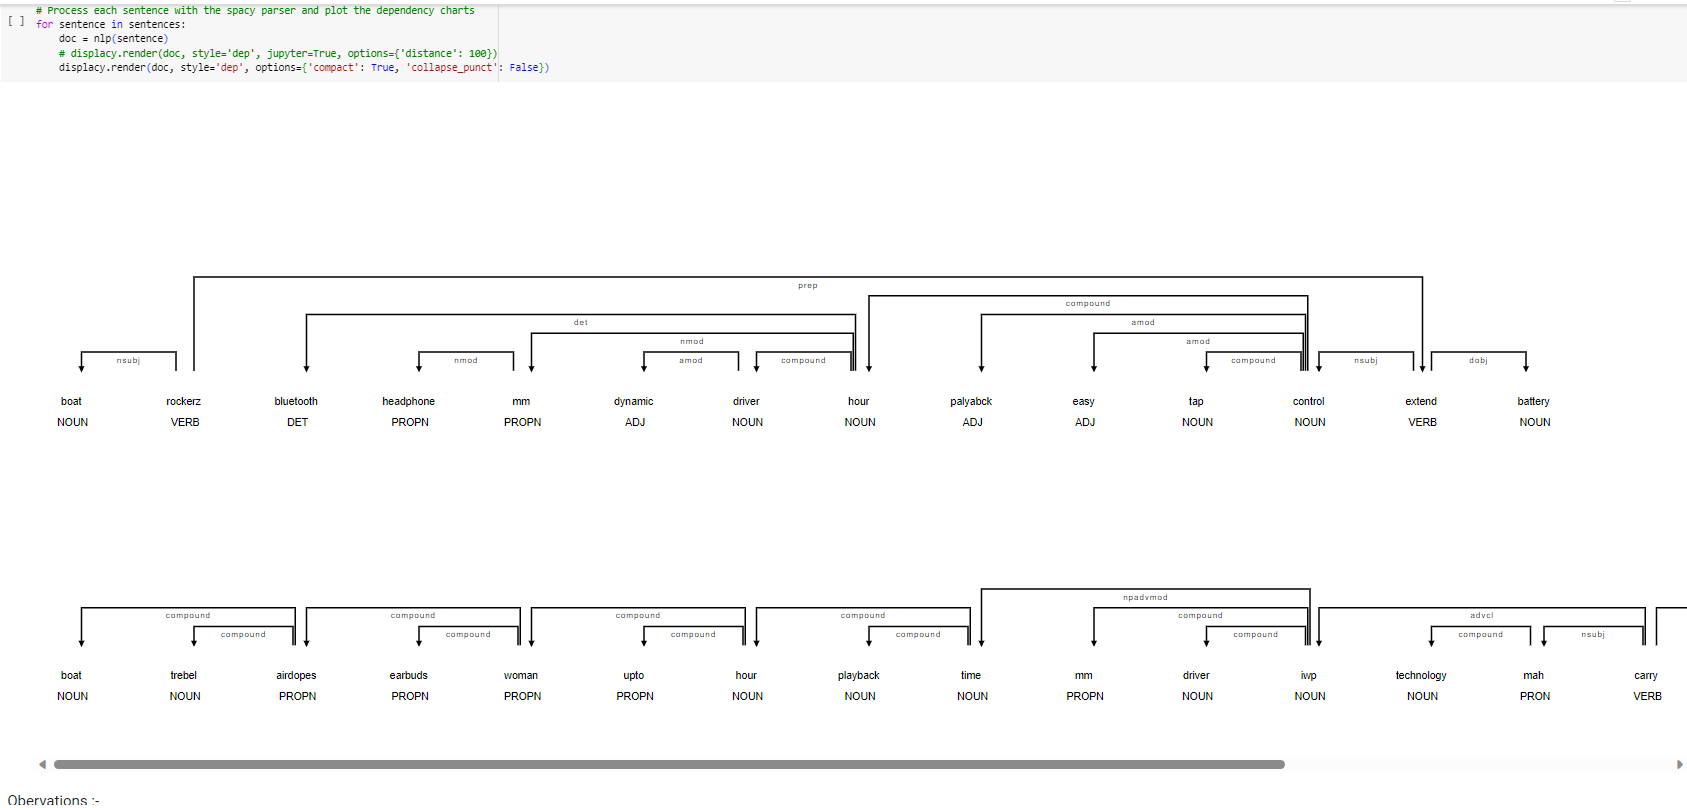